<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 구성하는 절차
1. 더미데이터 준비(트레이닝용)
2. 훈련용, 검증용, 테스트용으로 나누기
3. 심층 만들기(dense)
4. model에 적용
5. 컴파일 진행(최적화기법을 적용 : adam 사용)
6. fit(훈련)
7. evaluate(검증)

* 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련 과정이 상세하게 출려되어 확인 할 수 있다.(에포크 횟수, 손실, 정확도) -> 아래쪽에 <keras.src.callbacks.history.History at 0x7cd1f7a0eaa0> 출력(실행 결과) 메세지가 나온다.
* 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력한다.
* fit() 메서드는 History라는 클래스 객체를 반환 한 것이다 (훈련과정의 지표, 손실, 정확도 등이있다) 이 값을 잘 활용하면 그래프를 그릴 수 있다.

In [1]:
# 더미데이터 준비, 훈련,검증,테스트용 나누기
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
# \ : 엔터효과 제거 -> 한줄로 긴 문장 자름
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split (train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print('train',train_scaled.shape, train_target.shape)
print('test',test_input.shape, test_target.shape)
print('val',val_scaled.shape, val_target.shape)

train (48000, 28, 28) (48000,)
test (10000, 28, 28) (10000,)
val (12000, 28, 28) (12000,)


In [3]:
# 심층 만들기, 모델 적용하기
def model_fn(a_layer=None): # 모델을 만드는 간단한 함수 정의하기 (하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층
    model.add(keras.layers.Dense(100, activation='relu')) # 은닉층

    # model_fn() 함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가한다
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax')) # 출력층
    return model

In [4]:
model = model_fn() # 위에서 만든 메서드 호출하여 모델에 담음
model.summary() # 모델의 요약정보를 봄

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 컴파일 진행하기
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 컴파일(다중분류, 정확도)

In [6]:
# fit() 메서드 결과를 history 변수에 담음
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# 훈련과정 출력 조절
# verbose = 0 훈련과정을 나타내지 않음
# verbose = 1 기본값, 에포크마다 진행, 막대와 함게 손실등의 지표가 출력된다
# verbose = 2 진행막대 빼고 출력한다

In [7]:
print(history.history.keys())
# 훈련 측정값이 담겨있는 history 딕셔너리가 존재한다, 정확도 accuracy, 손실 loss값이 있다
# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에 history속성에 포함되어있다.

dict_keys(['accuracy', 'loss'])


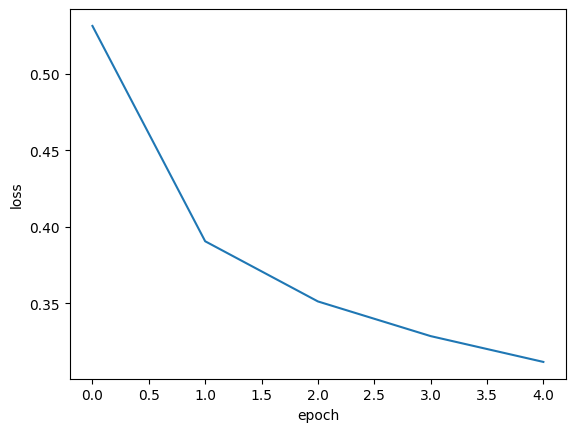

In [8]:
# 손실 출력
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능하다.
plt.plot(history.history['loss'])
plt.xlabel('epoch') # 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현된다.
plt.ylabel('loss') # 손실된 값
plt.show() # 에포크마다 손실 감소

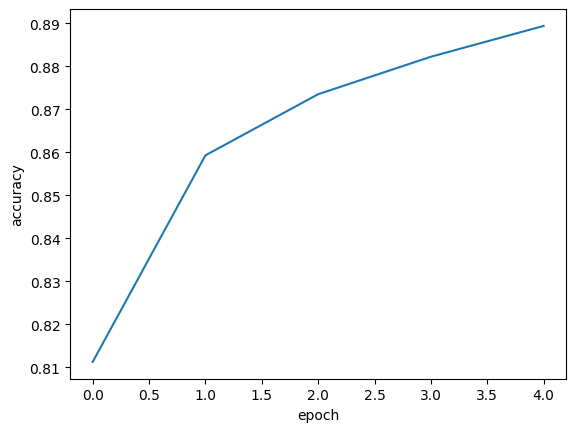

In [9]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() # 에포크마다 정확도 향상

In [10]:
# 에포크 횟수 20으로 늘려보기
model = model_fn() # 위에서 만든 메서드로 모델 생성(3개층 : 입력,은닉,출력)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

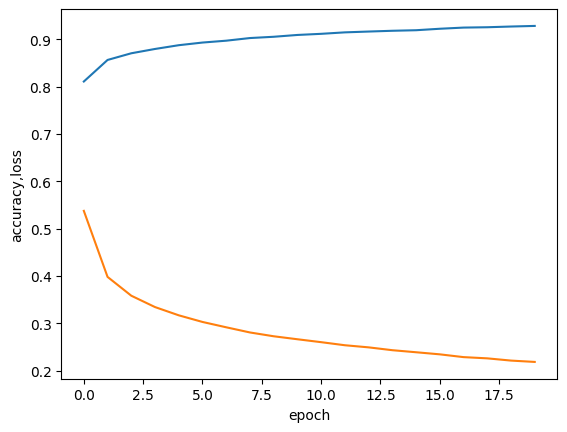

In [11]:
# 손실률, 정확도 출력
plt.plot(history.history['accuracy']) # 정확도 (파란색)
plt.plot(history.history['loss']) # 손실률 (주황색)
plt.xlabel('epoch') # 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현된다.
plt.ylabel('accuracy,loss') # 손실된 값
plt.show() # 에포크마다 손실 감소, 정확도 증가

# 검증손실
* 예전에 확률적 경사강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다. 인공신경망은 모두 일종의 경사하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

* 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트에 대한 점수도 필요하다. 그래서 위에 처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다. 검증 손실을 이용해서 과대.과소 적합을 응용하겠다.

keypoint
* 손실을 사용하는 것과 정확도를 사용하는 것의 차이
    1. 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수다
    2. 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있다
    3. 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법이다

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
# verbose = 0 훈련과정을 나타내지 않음, verbose = 2 진행막대 빼고 출력한다
# verbose = 1 기본값, 에포크마다 진행, 막대와 함게 손실등의 지표가 출력된다

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9003 - loss: 0.2868 - 

In [13]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss, 추가 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


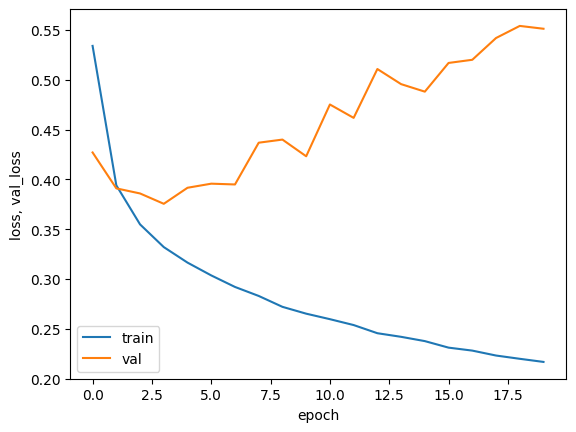

In [14]:
# 과대/과소 적합 문제를 조사하기위해 훈련손실,검증손실을 한 그래프에 그려서 비교해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss, val_loss')
plt.legend(['train', 'val'])
plt.show()

결과 분석
* 초기에 검증손실이 감소하다가 다섯번째 에포크만에 다시 상승했고 훈련손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어졌다
* 검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 것 같다
* 과대적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자

-
* 옵티마이저 하이퍼파라미터를 조절하여 과대적합 완화시켜보기
* RMSprop 옵티마이저는 많은 문제에서 잘 동작한다 -> 다른 방법으로는 Adam이 있다

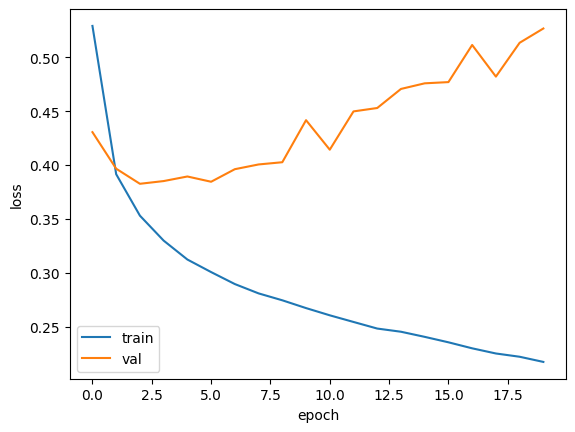

In [15]:
model = model_fn()
model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

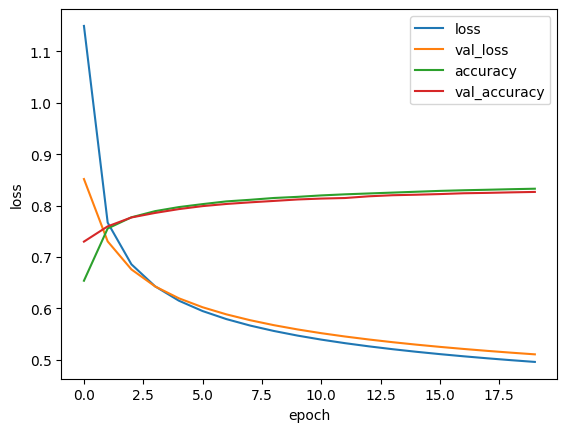

In [16]:
model = model_fn()
adagrad = keras.optimizers.Adagrad() # Adagrad기법으로 최적화 후 차트로 보기
model.compile(optimizer=adagrad,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

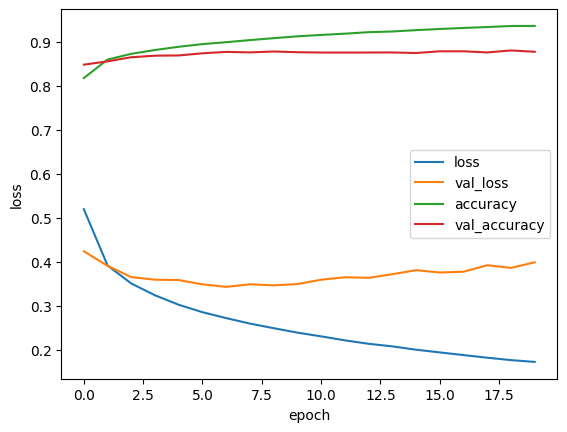

In [17]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

드롭아웃(Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개하였다.
1. 훈련과정에서 층에있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만든다) 과대 적합을 막는다.
2. 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없다
3. 다른 샘플을 처리할 때는 은닉층의 첫번재 뉴런이 드롭아웃되어 h1 출력이 없다.
* 뉴런은 랜덤하게 드롭웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것이다
* 드롭아웃이 왜 과대적합을 막을 수 있을지 생각 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다.
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것이다.

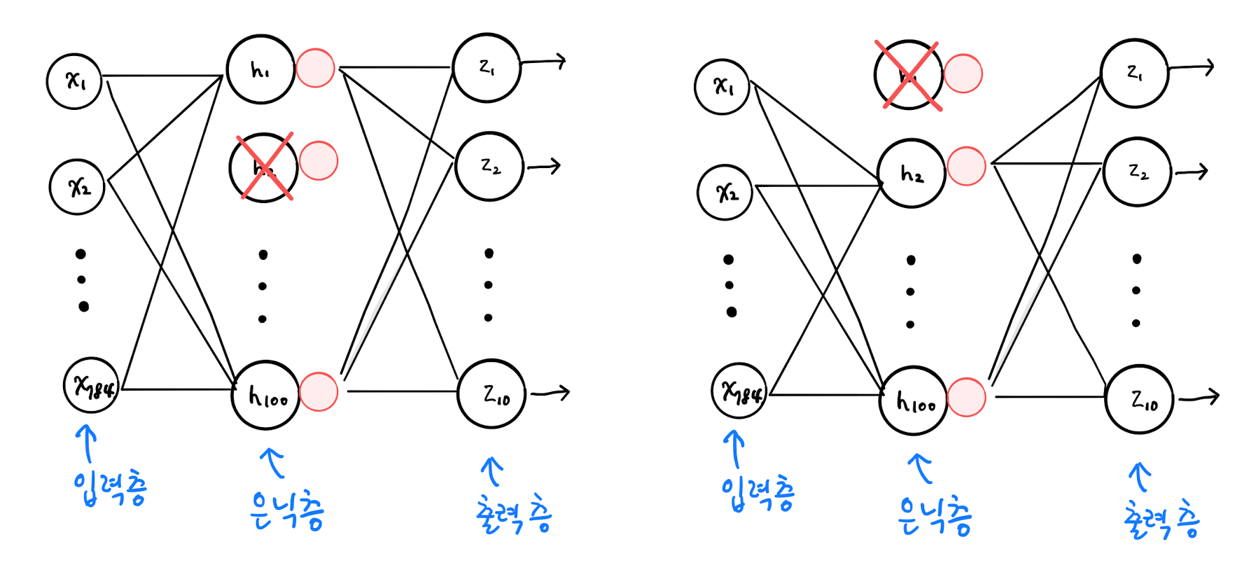

또 다른 분석
* 앞의 드롭아웃이 적용된 2개의 신경망그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 된다
* 앙상블 : 더 좋은 예측을 만들기 위해 여러개의 모델을 3훈련하는 머신러닝 알고리즘으로 과대적합을 막아주는 좋은 기법이다
1. 케라스에서 드롭아웃을 keras.layers.Dropout로 제공한다
2. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만든다
3. 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없다

In [25]:
# model_fn함수에 드롭 아웃 객체를 전달하여 층 추가
model = model_fn(keras.layers.Dropout(0,3)) # 30%정도 드롭 아웃
model.summary() # 요약 확인
# 은닉층 뒤에 추가된 드롭아웃층(3번째 값)은 훈련되는 모델 파라미터가 없고 입력과 출력의 크기가 같다
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

주의사항
* 훈련이 끝난뒤 평가나 예측을 수행할 때 드롭아웃을 적용하지 않는다. 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행된다
* 텍서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않는다.

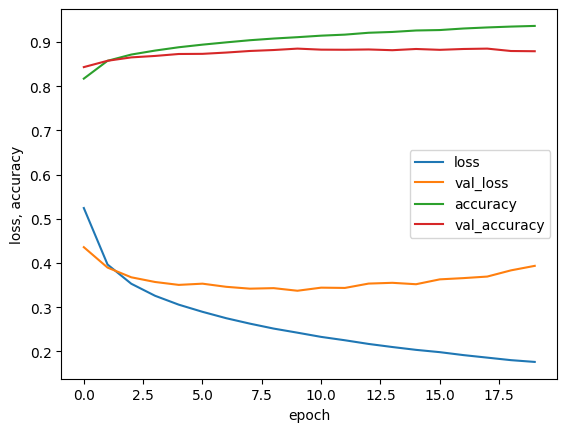

In [26]:
# 훈련 손실과 검증 손실의 그래프 그려보기
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show() # 과대적합이 확실히 줄어들었다 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않았다
# 20번의 에포크를 실행해서 결국 과대적합이 되었다 -> 10번만 해보기

In [27]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save('model-whole.keras') # 모델 저장
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights()메서드가 있다
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5포멧으로 저장한다. https://geunuk.tistory.com/466
model.save_weights('model.weights.h5') #HDF형식으로 저장

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# 이제는 저장한 모델을 불러와 테스트를 진행 해보자
!ls -al model* # ls : 리스트 보여달라는 명령어로 model로 시작하는 파일들을 보여줌

-rw-r--r-- 1 root root 971928 Jan 10 05:52 model.weights.h5
-rw-r--r-- 1 root root 974763 Jan 10 05:52 model-whole.keras


In [31]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용해보기
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델 / 30% 드롭아웃
model.load_weights('model.weights.h5') # 이전에 저장했던 모델 파라미터 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weight() 메서드다
# 주의사항 : load_weights() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다.
model.summary() # 요약 확인

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 모델의 검증 정확도 확인해보기
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환하고(다중분류)
# 패션 MNIST 데이터셋에서 덜어낸 검증세트의 샘플수가 12000개이기 때문에 (12000, 10)크기의 배열을 반환한다
# 10개의 확률 중 가장 큰 값의 인덱스를 골라서(.argmax) 타깃레이블과 비교하여 정확도를 파악
# axis=-1 배열의 마지막 차원을 따라 최대값을 고른다.

# argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여
# 같으면 1이되고 다르면 0이 된다 -> 이것을 평균으로 출력해 본 것이다(정확도)

print('평균 : ',np.mean(val_labels == val_target))
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 된다.
# 아래 그림처럼 5X3배열에 axis=1로 한 값과 axis=0으로 한 값의 인덱스를 반환함

# axis값이 1이면 열을 따라 각 행의 최대값의 인덱스를 선택하고 0이면 행을따라 열의 최대값의 인덱스를 선택한다
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교해서
# 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 (평균하면 정확도가 된다)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
평균 :  0.8800833333333333


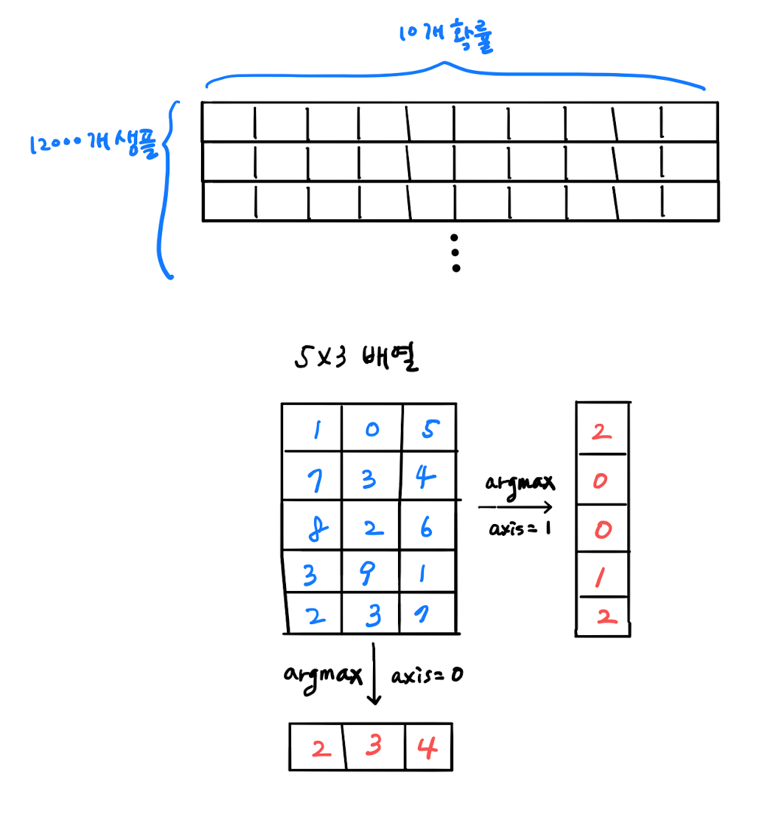

In [34]:
# 모델 전체를 파일에서 읽은 다음 검증세트의 정확도를 출력해봄
model = keras.models.load_model('model-whole.keras') # load_model() : 저장된 케라스 파일 읽기
model.evaluate(val_scaled, val_target) # 같은 모델을 불러들였기 때문에 위와 정확도가 같다

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3471


[0.3467273712158203, 0.8800833225250244]

* 현재 상태 분석 : 20번의 에포크동안 모델을 훈련하여 검증점수가 상승하는 지점을 확인
* 모델을 과대적합되지 않은 에포크만큼 다시 훈련함
* 모델을 두번식 훈련하지 않고 한번에 끝내는 방법을 연구해보자 -> 케라스 콜백

실험2
* 아예 파일로 새로운 모델을 만들고 바로 사용해보기 (콜백이라는 것을 활용 해보기)
* 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체다. 케라스.콜백 패키지에 있다.
* fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용한다
* 지금 우리가 사용할 콜백은 ModelCheckpoint Callback으로 에포크마다 모델을 저장한다
* save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

In [36]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 드롭아웃
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# 모델 훈련 후 best-model.keras에 (낮은 점수가 좋은거)최상의 검증 점수를 낸 모델이 저장된다.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model = keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와서 다시 예측 실행
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.3175


[0.323847234249115, 0.8821666836738586]

* keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해준다 (여전히 20번의 에포크동안 훈련한다)
* 사실 검증점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속 할 필요가 없다
* 이때 훈련을 종료하면 자원과 시간을 아낄 수 있다 -> 조기종료(early stopping) : 딥러닝 분야에 많이 사용하는 기법이다
* 규제방법 중하나로 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 한다.

케라스에는 조기종료를 위한 (조기)Early(종료)Stopping 콜백을 제공한다
* 이 콜백의 patience 매개변수는 검증점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.
* patience=2 : 2번 연속 검증점수가 향상되지 않으면 훈련을 중지(patience:인내심)
* restore_best_weight=True -> 가장 낮은 검증 손실을 낸 모델 파라미터로 돌린다.

In [41]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

#가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할때 훈련을 중지할 수 있다
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7318 - loss: 0.7671 - val_accuracy: 0.8395 - val_loss: 0.4360
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8405 - loss: 0.4517 - val_accuracy: 0.8591 - val_loss: 0.3885
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8521 - loss: 0.4105 - val_accuracy: 0.8740 - val_loss: 0.3559
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8592 - loss: 0.3870 - val_accuracy: 0.8720 - val_loss: 0.3507
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8647 - loss: 0.3697 - val_accuracy: 0.8768 - val_loss: 0.3435
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8693 - loss: 0.3538 - val_accuracy: 0.8763 - val_loss: 0.3391
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8724 - loss: 0.3447 - val_accuracy: 0.8754 - val_loss: 0.3377
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8774 - loss: 0.3371 - 

10


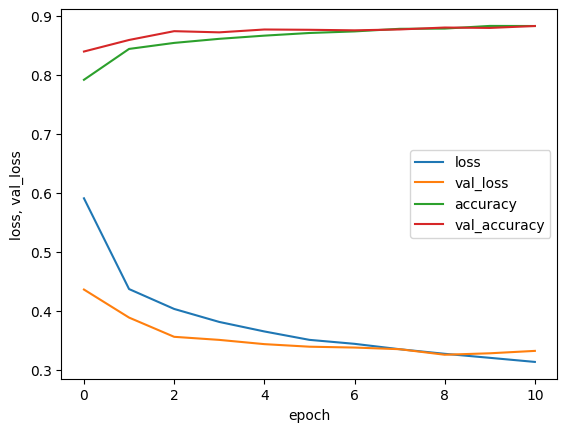

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8821 - loss: 0.3261


[0.32549065351486206, 0.8801666498184204]

In [47]:
print(early_stopping_cb.stopped_epoch) # 조기종료 시점 에포크

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, val_loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

model.evaluate(val_scaled, val_target) # 검증세트 성능 확인
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해준다.

10
